In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
import random

import requests
from urllib.parse import urlencode
from io import StringIO

# прочитаем файлы в датафреймы, выполнив парсинг дат

df_customers = pd.read_csv('olist_customers_dataset.csv', encoding = 'UTF-8')
df_items     = pd.read_csv('olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])
df_orders    = pd.read_csv('olist_orders_dataset.csv', encoding = 'UTF-8', 
                           parse_dates=['order_purchase_timestamp','order_approved_at',
                                        'order_delivered_carrier_date','order_delivered_customer_date',
                                        'order_estimated_delivery_date'])

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key_cust = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg' 
public_key_items = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'
public_key_orders = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'


final_url_c = base_url + urlencode({'public_key': public_key_cust})
final_url_i = base_url + urlencode({'public_key': public_key_items})
final_url_o = base_url + urlencode({'public_key': public_key_orders})
response_c = requests.get(final_url_c)
response_i = requests.get(final_url_i)
response_o = requests.get(final_url_o)
download_url_c = response_c.json()['href']
download_url_i = response_i.json()['href']
download_url_o = response_o.json()['href']



download_response_c = requests.get(download_url_c)
data_c = StringIO(download_response_c.content.decode('utf-8'))

download_response_i = requests.get(download_url_i)
data_i = StringIO(download_response_i.content.decode('utf-8'))

download_response_o = requests.get(download_url_o)
data_o = StringIO(download_response_o.content.decode('utf-8'))

df_customers = pd.read_csv(data_c, sep=',')
df_items = pd.read_csv(data_i, sep=',')
df_orders = pd.read_csv(data_o, sep=',',parse_dates=['order_purchase_timestamp','order_approved_at',
                                        'order_delivered_carrier_date','order_delivered_customer_date',
                                        'order_estimated_delivery_date'])




In [3]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
df_orders.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

1) ПРОВЕДЕМ EDA АНАЛИЗ

Смотрим структуру данных в таблицах и их типы

In [6]:
df_orders.shape

(99441, 8)

In [7]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [9]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
df_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [11]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [12]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [13]:
df_merged = pd.merge(df_orders,df_items, on = 'order_id', how = 'right')
df_merged = pd.merge(df_merged,df_customers, on = 'customer_id', how = 'left')

In [14]:
df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [15]:
df_merged.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,35119.309090
std,0.705124,183.633928,15.806405,29866.120801
min,1.000000,0.850000,0.000000,1003.000000
25%,1.000000,39.900000,13.080000,11310.000000
50%,1.000000,74.990000,16.260000,24340.000000
75%,1.000000,134.900000,21.150000,59028.750000
max,21.000000,6735.000000,409.680000,99990.000000


Уникальные значения в ДС

In [16]:
exclude_cols = ['order_id','customer_id', 'product_id', 'seller_id','customer_unique_id' ]

In [17]:
for col in df_merged.select_dtypes(include=['object']).columns:
    if col not in exclude_cols:
        print(f"Статистика для {col}:")
        print(df_merged[col].value_counts())

Статистика для order_status:
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64
Статистика для shipping_limit_date:
2017-07-21 18:25:23    21
2018-03-01 02:50:48    21
2017-08-30 14:30:23    20
2017-02-03 21:44:49    15
2017-11-30 10:30:51    15
                       ..
2018-03-09 17:15:35     1
2018-01-15 16:38:26     1
2017-10-02 11:24:44     1
2017-04-27 18:30:16     1
2018-01-25 16:59:56     1
Name: shipping_limit_date, Length: 93318, dtype: int64
Статистика для customer_city:
sao paulo                     17808
rio de janeiro                 7837
belo horizonte                 3144
brasilia                       2392
curitiba                       1751
                              ...  
mombaca                           1
jacarau                           1
felixlandia                       1
aparecida de monte alto           1
presidente castel

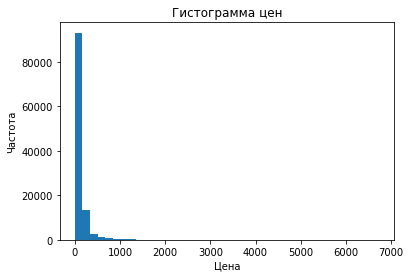

In [18]:
plt.hist(df_merged['price'], bins = 40)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Гистограмма цен')
plt.show()

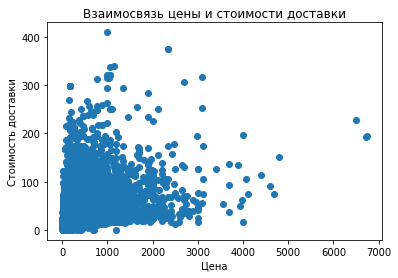

In [19]:
plt.scatter(df_merged['price'], df_merged['freight_value'])
plt.xlabel('Цена')
plt.ylabel('Стоимость доставки')
plt.title('Взаимосвязь цены и стоимости доставки')
plt.show()

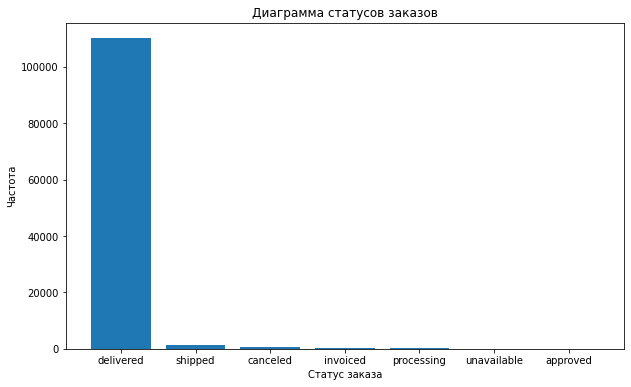

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(df_merged['order_status'].value_counts().index, df_merged['order_status'].value_counts())
plt.xlabel('Статус заказа')
plt.ylabel('Частота')
plt.title('Диаграмма статусов заказов')
plt.show()

In [21]:
columns_with_nan = df_merged.columns[df_merged.isna().any()].tolist()
print("Колонки с NaN значениями:", columns_with_nan)



Колонки с NaN значениями: ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']


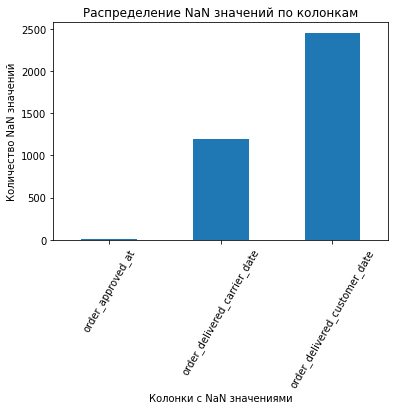

In [22]:
# Построение графика распределения NaN значений по колонкам
nan_counts = df_merged[columns_with_nan].isna().sum()
nan_counts.plot(kind='bar')
plt.xlabel('Колонки с NaN значениями')
plt.ylabel('Количество NaN значений')
plt.title('Распределение NaN значений по колонкам')
plt.xticks(rotation=60)
plt.show()

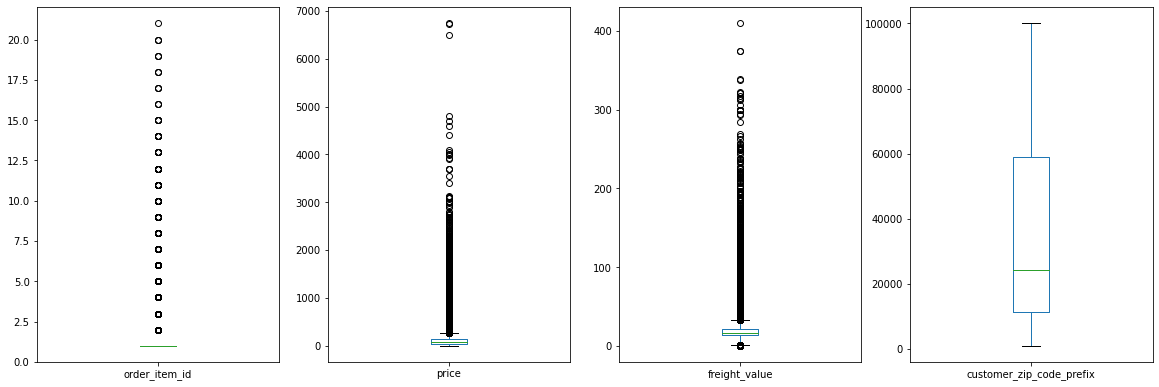

In [23]:
df_merged.plot(kind='box', subplots=True, layout=(4,4), figsize=(20, 30), sharex=False, sharey=False)
plt.show()

In [24]:
df_merged.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

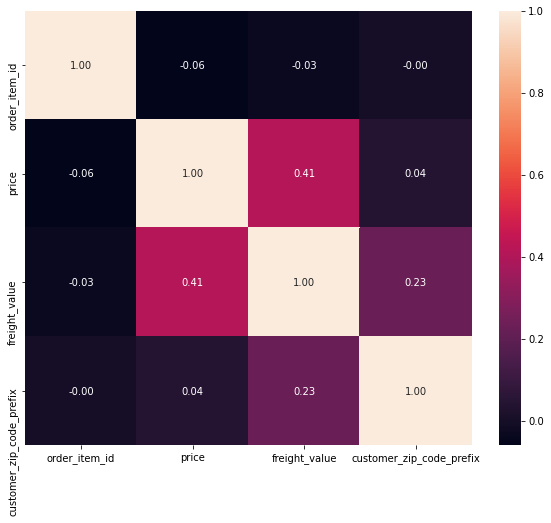

In [25]:
# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged.corr(), annot=True, fmt=".2f")
plt.show()

# ШАГ 1
# Пользователи, совершившие только одну покупку(за покупку считаем заказы со статусом "delivered")

In [26]:
delivered_orders = df_merged[df_merged['order_status'] == 'delivered']

orders_per_customer = delivered_orders.groupby('customer_unique_id')['order_id'].nunique()

one_delivered_order_customers = orders_per_customer[orders_per_customer == 1].count()

print ("Количество пользователей, совершивших только один заказ: ", one_delivered_order_customers)

Количество пользователей, совершивших только один заказ:  90557


# ШАГ 2

# Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [27]:
df_orders_m = df_merged

In [28]:
df_orders_m['order_status'].unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [29]:
canceled_orders  = df_orders_m.groupby('order_status').agg({'order_id' : 'count'})
canceled_orders

,order_id
order_status,
approved,3
canceled,542
delivered,110197
invoiced,359
processing,357
shipped,1185
unavailable,7


Считаем месячный промежуток 

In [30]:
df_orders_m['year_month'] = df_orders_m['order_purchase_timestamp'].dt.to_period('M')


In [31]:
not_delivered_orders = df_orders_m[df_orders_m['order_status'].isin(['unavailable', 'canceled'])]
not_delivered_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
year_month                            period[M]
dtype: object

In [32]:
not_delivered_count = not_delivered_orders.groupby(['year_month','order_status'], as_index = False).agg({'order_id':'count'}).rename(columns ={'order_id': 'orders_count'})
not_delivered_count

,year_month,order_status,orders_count
0,2016-09,canceled,1
1,2016-10,canceled,14
2,2016-10,unavailable,7
3,2017-01,canceled,2
4,2017-02,canceled,15
5,2017-03,canceled,25
6,2017-04,canceled,24
7,2017-05,canceled,30
8,2017-06,canceled,12
9,2017-07,canceled,26


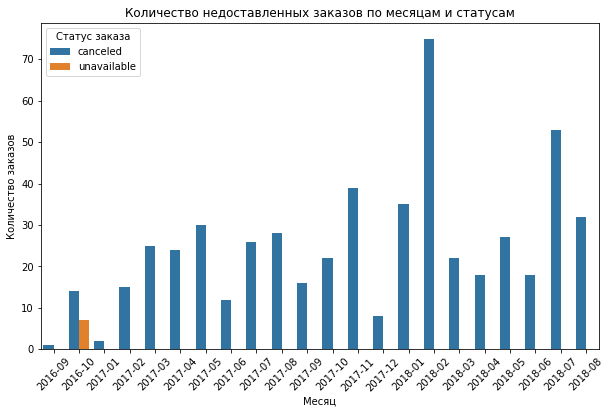

In [33]:
plt.figure(figsize=(10, 6))

sns.barplot(data=not_delivered_count, x='year_month', y='orders_count', hue='order_status')

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Количество недоставленных заказов по месяцам и статусам')
plt.legend(title='Статус заказа')
plt.xticks(rotation=45)
plt.show()

In [34]:
not_delivered_count.groupby('order_status')['orders_count'].mean()

order_status
canceled       24.636364
unavailable     7.000000
Name: orders_count, dtype: float64

orders_count    AxesSubplot(0.125,0.71587;0.168478x0.16413)
dtype: object

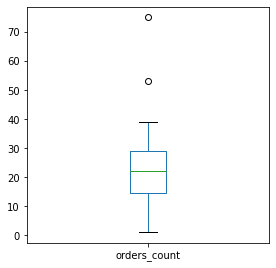

In [35]:
not_delivered_count.plot(kind='box', subplots=True, layout=(4,4), figsize=(20, 20), sharex=False, sharey=False)


# ШАГ 3
# По каждому товару определить, в какой день недели товар чаще всего покупается.


In [36]:
df_merged_week_day = df_merged

In [37]:
df_merged_week_day['week_day'] = df_merged_week_day['order_purchase_timestamp'].dt.day_name()
df_merged_week_day.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,week_day
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,Wednesday
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,Sunday
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,Saturday


код, неучитывающий одинаковое количество заказов в дни недели:



In [38]:
product_purchase_count_by_day  = df_merged_week_day.groupby(['product_id', 'week_day'], as_index=False)\
                                                    .agg({'order_purchase_timestamp':'count'})

product_purchase_count_by_day= product_purchase_count_by_day.loc[product_purchase_count_by_day\
                                                            .groupby('product_id')['order_purchase_timestamp'].idxmax()]\
                                                            .sort_values('order_purchase_timestamp', ascending=False).reset_index()
product_purchase_count_by_day


,index,product_id,week_day,order_purchase_timestamp
0,15902,422879e10f46682990de24d770e7f83d,Wednesday,93
1,36513,99a4788cb24856965c36a24e339b6058,Monday,92
2,41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
4,12998,368c6c730842d78016ad823897a372db,Friday,67
...,...,...,...,...
32946,23676,62b07aff118f62756ee579afeedc3eb0,Thursday,1
32947,23675,62ae6a8f5789aec14529a277c7516def,Sunday,1
32948,23669,62abef05dddbd149514e4339c84f7d7d,Sunday,1
32949,23667,62a6991adbb1e60f5c03a77fae5568ff,Monday,1


исправленный вариант:

In [39]:
product_purchase_count_by_day = df_merged_week_day.groupby(['product_id', 'week_day'], as_index=False)\
                                                  .agg(order_purchase_count=('order_purchase_timestamp', 'count'))

max_orders = product_purchase_count_by_day.groupby('product_id')['order_purchase_count'].transform('max')

product_purchase_count_by_day = product_purchase_count_by_day[product_purchase_count_by_day['order_purchase_count'] == max_orders]

product_purchase_count_by_day = product_purchase_count_by_day.sort_values('order_purchase_count', ascending=False)

product_purchase_count_by_day

,product_id,week_day,order_purchase_count
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13537,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23554,6249107c28285443c430b2663f3e49db,Sunday,1
23553,62487ad072596c457fd65db240a755b8,Tuesday,1
23552,62487ad072596c457fd65db240a755b8,Monday,1
23551,624846a50026c57927e1156335b120f6,Thursday,1


# ШАГ 4
# Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [40]:
df_orders_m.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,week_day
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,Wednesday
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,Sunday
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,Saturday


найти количество покупок в каждый месяц, затем разделить на кол-во недель

In [41]:
df_orders_m['weeks_in_month'] = (df_orders_m['order_purchase_timestamp'].dt.days_in_month) /7
df_orders_m

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,week_day,weeks_in_month
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,Wednesday,4.285714
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,...,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,Wednesday,4.285714
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,...,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,Sunday,4.428571
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,...,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,Wednesday,4.428571
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,...,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,Saturday,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1,4aa6014eceb682077f9dc4bffebc05b0,...,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,2018-04,Monday,4.285714
112646,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1,32e07fd915822b0765e448c4dd74c828,...,2018-07-20 04:31:48,350.00,36.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,2018-07,Saturday,4.428571
112647,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1,72a30483855e2eafc67aee5dc2560482,...,2017-10-30 17:14:25,99.90,16.95,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,2017-10,Monday,4.428571
112648,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1,9c422a519119dcad7575db5af1ba540e,...,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,2017-08,Monday,4.428571


In [42]:
cust_purchase_week = df_orders_m.query("order_status == 'delivered'")

cust_purchase_week = cust_purchase_week.groupby(['customer_unique_id', 'year_month'], as_index=False)\
                                        .agg({'order_id':'nunique', 'weeks_in_month':'mean'})

cust_purchase_week['avg_purch_per_week'] = cust_purchase_week['order_id']\
                                    / cust_purchase_week['weeks_in_month']
                                    
cust_purchase_week = cust_purchase_week.drop(columns =['order_id','weeks_in_month'])
cust_purchase_week

,customer_unique_id,year_month,avg_purch_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.233333
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.225806
95191,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
95192,ffff5962728ec6157033ef9805bacc48,2018-05,0.225806


In [43]:
cust_purchase_week.year_month = cust_purchase_week['year_month'].dt.to_timestamp()


In [44]:
customer_id = cust_purchase_week['customer_unique_id'].sample(n=1,random_state= None).iloc[0]
customer_id

'3b5e7b15240ddea08729bdc7b9ececb3'

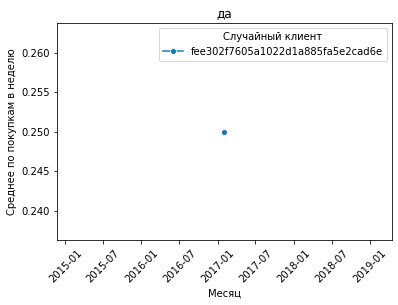

In [45]:
customer_id = cust_purchase_week['customer_unique_id'].sample(n=1,random_state= None).iloc[0]
sns.lineplot(data=cust_purchase_week.query('customer_unique_id == @customer_id'), x='year_month', y='avg_purch_per_week', marker='o', label = customer_id)
plt.xlabel('Месяц')
plt.ylabel('Среднее по покупкам в неделю')
plt.title('да')
plt.legend(title='Случайный клиент')
plt.xticks(rotation=45)
plt.show()

# 5 Когортный анализ пользователей
# В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

In [52]:
df_orders_k = df_merged.query("order_status == 'delivered'")

In [53]:
df_orders_k['first_month_cohort'] = df_orders_k.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')\
                                                .dt.to_period('M')
df_orders_k

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,week_day,weeks_in_month,first_month_cohort
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,58.90,13.29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,Wednesday,4.285714,2017-09
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,...,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,Wednesday,4.285714,2017-04
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,...,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,Sunday,4.428571,2018-01
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,...,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,Wednesday,4.428571,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,...,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,Saturday,4.000000,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1,4aa6014eceb682077f9dc4bffebc05b0,...,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,2018-04,Monday,4.285714,2018-04
112646,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1,32e07fd915822b0765e448c4dd74c828,...,350.00,36.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,2018-07,Saturday,4.428571,2018-07
112647,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1,72a30483855e2eafc67aee5dc2560482,...,99.90,16.95,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,2017-10,Monday,4.428571,2017-10
112648,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1,9c422a519119dcad7575db5af1ba540e,...,55.99,8.72,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,2017-08,Monday,4.428571,2017-08


In [54]:
df_orders_k = df_orders_k.groupby(['customer_unique_id','year_month','first_month_cohort'], as_index =False).agg(order_count = ('order_id', 'nunique'))
df_orders_k

,customer_unique_id,year_month,first_month_cohort,order_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,2017-11,1
...,...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2017-06,1
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12,2017-12,1
95191,ffff371b4d645b6ecea244b27531430a,2017-02,2017-02,1
95192,ffff5962728ec6157033ef9805bacc48,2018-05,2018-05,1


In [55]:
df_orders_k.dtypes

customer_unique_id       object
year_month            period[M]
first_month_cohort    period[M]
order_count               int64
dtype: object

In [56]:
df_orders_k.year_month = df_orders_k['year_month'].dt.to_timestamp()
df_orders_k.first_month_cohort = df_orders_k['first_month_cohort'].dt.to_timestamp()

In [57]:
df_orders_k

,customer_unique_id,year_month,first_month_cohort,order_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,2017-11-01,1
...,...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,2017-06-01,1
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,2017-12-01,1
95191,ffff371b4d645b6ecea244b27531430a,2017-02-01,2017-02-01,1
95192,ffff5962728ec6157033ef9805bacc48,2018-05-01,2018-05-01,1


In [58]:
# Вычисление периода удержания
df_orders_k['cohort_index'] = (df_orders_k['year_month'] - df_orders_k['first_month_cohort']) // np.timedelta64(1, 'M')
df_orders_k

,customer_unique_id,year_month,first_month_cohort,order_count,cohort_index
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,2018-05-01,1,0
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,2017-10-01,1,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,2017-11-01,1,0
...,...,...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,2017-06-01,1,0
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,2017-12-01,1,0
95191,ffff371b4d645b6ecea244b27531430a,2017-02-01,2017-02-01,1,0
95192,ffff5962728ec6157033ef9805bacc48,2018-05-01,2018-05-01,1,0


In [59]:
# Создание сводной таблицы для когортного анализа
cohort_data = df_orders_k.groupby(['first_month_cohort', 'cohort_index'])['customer_unique_id'].nunique().reset_index()
cohort_data

,first_month_cohort,cohort_index,customer_unique_id
0,2016-09-01,0,1
1,2016-10-01,0,262
2,2016-10-01,5,1
3,2016-10-01,8,1
4,2016-10-01,11,1
...,...,...,...
185,2018-06-01,0,5878
186,2018-06-01,2,16
187,2018-07-01,0,5949
188,2018-07-01,1,31


In [60]:
cohort_counts = cohort_data.pivot(index='first_month_cohort', columns='cohort_index', values='customer_unique_id')
cohort_counts

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_month_cohort,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,262.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,717.0,4.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,NaN,4.0,1.0,2.0,3.0,NaN,1.0,NaN
2017-02-01,1628.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03-01,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,7.0,NaN,7.0,NaN,6.0,2.0,3.0,NaN,NaN
2017-04-01,2256.0,NaN,9.0,NaN,6.0,6.0,8.0,7.0,7.0,4.0,8.0,1.0,1.0,2.0,2.0,NaN,3.0,NaN,NaN,NaN
2017-05-01,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,18.0,NaN,20.0,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN
2017-06-01,3037.0,NaN,12.0,13.0,9.0,12.0,11.0,7.0,10.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Рассчитываем уровень удержания
retention_matrix = cohort_counts.divide(cohort_counts.iloc[:, 0], axis=0)
retention_matrix


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_month_cohort,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.003817,NaN,0.007634,0.007634
2016-12-01,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.005579,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,NaN,0.004184,0.001395,0.006974,NaN,0.005579,0.001395,0.002789,0.004184,NaN,0.001395,NaN
2017-02-01,1.0,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03-01,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.002797,NaN,0.002797,NaN,0.002397,0.000799,0.001199,NaN,NaN
2017-04-01,1.0,NaN,0.003989,NaN,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.003546,0.000443,0.000443,0.000887,0.000887,NaN,0.001330,NaN,NaN,NaN
2017-05-01,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.005216,NaN,0.005795,NaN,0.002028,NaN,0.002028,NaN,NaN,NaN,NaN
2017-06-01,1.0,NaN,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.003293,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
retention_matrix = pd.DataFrame(retention_matrix)
retention_matrix

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_month_cohort,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.003817,NaN,0.007634,0.007634
2016-12-01,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.005579,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,NaN,0.004184,0.001395,0.006974,NaN,0.005579,0.001395,0.002789,0.004184,NaN,0.001395,NaN
2017-02-01,1.0,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03-01,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.002797,NaN,0.002797,NaN,0.002397,0.000799,0.001199,NaN,NaN
2017-04-01,1.0,NaN,0.003989,NaN,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.003546,0.000443,0.000443,0.000887,0.000887,NaN,0.001330,NaN,NaN,NaN
2017-05-01,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.005216,NaN,0.005795,NaN,0.002028,NaN,0.002028,NaN,NaN,NaN,NaN
2017-06-01,1.0,NaN,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.003293,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
def highlight_values(value, min_limit, max_limit):
    if value > max_limit:
        return 'background-color: yellow'
    elif value < min_limit:
        return 'background-color: red' 
    else:
        return 'background-color: orange' 


In [64]:
min_limit = 0.001
max_limit = 0.01

In [65]:
ur_style = (retention_matrix
            .style
            .set_caption('User retention by cohort') 
            .applymap(lambda x: highlight_values(x, min_limit,max_limit))  
            .highlight_null('white') 
            .format("{:.2%}", na_rep=""))
ur_style

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_month_cohort,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,100.00%,,,,,,,,,,,,,,,,,,,
2016-10-01 00:00:00,100.00%,,,,,0.38%,,,0.38%,,,0.38%,,0.38%,,0.38%,0.38%,,0.76%,0.76%
2016-12-01 00:00:00,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,0.56%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.42%,0.14%,0.70%,,0.56%,0.14%,0.28%,0.42%,,0.14%,
2017-02-01 00:00:00,100.00%,0.31%,0.12%,0.43%,0.12%,0.25%,0.18%,0.12%,0.18%,0.12%,0.31%,0.12%,0.18%,0.12%,0.06%,0.06%,0.18%,,,
2017-03-01 00:00:00,100.00%,0.44%,0.36%,0.40%,0.36%,0.16%,0.16%,0.32%,0.32%,0.08%,0.36%,0.28%,,0.28%,,0.24%,0.08%,0.12%,,
2017-04-01 00:00:00,100.00%,,0.40%,,0.27%,0.27%,0.35%,0.31%,0.31%,0.18%,0.35%,0.04%,0.04%,0.09%,0.09%,,0.13%,,,
2017-05-01 00:00:00,100.00%,0.46%,0.46%,0.29%,0.29%,0.32%,0.41%,0.14%,0.26%,0.52%,,0.58%,,0.20%,,0.20%,,,,
2017-06-01 00:00:00,100.00%,,0.40%,0.43%,0.30%,0.40%,0.36%,0.23%,0.33%,0.30%,0.36%,0.16%,0.16%,0.23%,,,,,,


# 6.RFM сегментация (с подробным описанием шагов)

In [66]:
# фильтруем данные по статусам
df_rfm = df_merged.query('order_status == "delivered"')

In [67]:
df_rfm.query('order_status == "delivered" & order_approved_at.isnull()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,week_day,weeks_in_month
8204,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,1,c6dd917a0be2a704582055949915ab32,...,2017-02-21 12:05:55,79.99,15.77,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,2017-02,Friday,4.000000
19005,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,1,c6dd917a0be2a704582055949915ab32,...,2017-02-22 16:15:03,79.99,26.82,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,2017-02,Saturday,4.000000
20473,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,1,4fd676d9c4723d475026e40aeae56957,...,2017-02-21 16:21:55,135.00,19.23,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,2017-02,Friday,4.000000
26393,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,1,db8ed3d08891d16a2438a67ab3acb740,...,2017-02-22 14:53:27,133.99,23.20,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,2017-02,Friday,4.000000
36128,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,1,7868a64aa111bbb4f41f8e1146c0becb,...,2017-02-28 14:52:27,59.90,17.16,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,2017-02,Saturday,4.000000
40822,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,1,c6dd917a0be2a704582055949915ab32,...,2017-02-22 15:48:35,79.99,26.82,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE,2017-02,Saturday,4.000000
49309,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,1,c3b271f47e73d0c9ccf1b43b7606c705,...,2017-01-29 22:26:59,45.90,14.52,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,2017-01,Thursday,4.428571
49336,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,1,583916a5dae918f5e89baec139141c54,...,2017-02-22 12:29:47,49.99,15.53,e1f01a1bd6485e58ad3c769a5427d8a8,8230,sao paulo,SP,2017-02,Saturday,4.000000
59699,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,1,8c5876b1c7768217964f353bc7e64393,...,2017-02-22 21:49:19,49.00,14.52,bc1896dc77f49e6dec880445a9b443a3,21020,rio de janeiro,RJ,2017-02,Saturday,4.000000
59700,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,2,8c5876b1c7768217964f353bc7e64393,...,2017-02-22 21:49:19,49.00,14.52,bc1896dc77f49e6dec880445a9b443a3,21020,rio de janeiro,RJ,2017-02,Saturday,4.000000


Тут мы можем заметить, что некоторые доставленные заказы, по непонятным причинам, имеют пропуски в подтверждениях.
Будем считать, что это какая-то ошибка в записи данных, не влияющая на конечную доставку клиенту.

Логичнее считать дату не от данного момента, а от последней записи в данных

In [68]:
today_date = df_orders['order_purchase_timestamp'].max()
today_date

Timestamp('2018-10-17 17:30:18')

In [69]:
#создаем дф для последуещейй РМФ сегментации 
last_purchase = df_rfm.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()

In [70]:
#создаем стобец с количеством дней от последней покупки
last_purchase['Recency'] = (today_date - last_purchase['order_purchase_timestamp']).dt.days


In [71]:
last_purchase.head()

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,163
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,585
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,369
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,336


In [72]:
#Считаем частоту
frequency = df_rfm.groupby('customer_unique_id', as_index = False).agg({'order_id':'nunique'}).rename(columns ={'order_id':'Frequency'})

In [73]:
frequency.Frequency.max()

15

In [74]:
#считаем сумму покупок
monetary = df_rfm.groupby('customer_unique_id')['price'].sum().reset_index(name='Monetary')

In [75]:
#объеденяем все в одну таблицу
RFM_table = last_purchase.merge(frequency, on='customer_unique_id')\
                         .merge(monetary, on='customer_unique_id').sort_values('Frequency', ascending=False)


In [76]:
RFM_table.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
51431,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,57,15,714.63
22779,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,231,9,1000.85
36706,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,111,7,664.20
73921,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,138,7,806.61
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,245,7,809.21


In [77]:
#рассчитываем квантили с шагом 20 процентов и кладем их в словарь
quintilesR = RFM_table['Recency'].quantile([.2, .4, .6, .8]).to_dict()
quintilesR

{0.2: 140.0, 0.4: 225.0, 0.6: 316.0, 0.8: 430.0}

In [78]:
quintilesF = RFM_table['Frequency'].quantile([.99, .999, .9999, .99999]).to_dict()
quintilesF

{0.99: 2.0, 0.999: 3.0, 0.9999: 5.664299999989453, 0.99999: 9.398580000037327}

In [79]:
quintilesM = RFM_table['Monetary'].quantile([.95, .99, .9999, .99999]).to_dict()
quintilesM

{0.95: 419.8089999999997,
 0.99: 1004.99,
 0.9999: 4399.956358999999,
 0.99999: 7790.034360037651}

In [80]:
#прописываем функции для дальнейшего присвоения "балла" РФМ
def r_score(x):
    if x <= quintilesR[.2]:
        return 5
    elif x <= quintilesR[.4]:
        return 4
    elif x <= quintilesR[.6]:
        return 3
    elif x <= quintilesR[.8]:
        return 2
    else:
        return 1

def f_score(x):
    if x <= quintilesF[.99]:
        return 1
    elif x <= quintilesF[.999]:
        return 2
    elif x <= quintilesF[.9999]:
        return 3
    elif x <= quintilesF[.99999]:
        return 4
    else:
        return 5   
    
def m_score(x):
    if x <= quintilesM[.95]:
        return 1
    elif x <= quintilesM[.99]:
        return 2
    elif x <= quintilesM[.9999]:
        return 3
    elif x <= quintilesM[.99999]:
        return 4
    else:
        return 5   
    
    

In [81]:
#присвоение балла Р Ф М в новых колонках
RFM_table['R'] = RFM_table['Recency'].apply(lambda x: r_score(x))
RFM_table['F'] = RFM_table['Frequency'].apply(lambda x: f_score(x))
RFM_table['M'] = RFM_table['Monetary'].apply(lambda x: m_score(x))

In [82]:
#создаем отдельный столбец с баллами РФМ, которые объеденены как строки
RFM_table['RFM_score'] = RFM_table['R'].map(str) + RFM_table['F'].map(str) + RFM_table['M'].map(str)
RFM_table

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R,F,M,RFM_score
51431,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,57,15,714.63,5,5,2,552
22779,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,231,9,1000.85,3,4,2,342
36706,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,111,7,664.20,5,4,2,542
73921,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,138,7,806.61,5,4,2,542
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,245,7,809.21,3,4,2,342
...,...,...,...,...,...,...,...,...,...
31564,565811ed44e539a14bc391cf57373ed1,2017-11-27 23:17:35,323,1,18.99,2,1,1,211
31563,5657f9f721c16800a66c21081d46b18d,2017-11-19 17:05:09,332,1,56.99,2,1,1,211
31562,5657dfebff5868c4dc7e8355fea865c4,2017-11-11 12:47:01,340,1,89.99,2,1,1,211
31561,5657596addb4d7b07b32cd330614bdf8,2017-11-03 04:20:05,348,1,159.99,2,1,1,211


In [83]:
#создаем словарь с градацией "званий", которые зависят от комбинаций параметров R and F
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

'''тут присваиваем новому столбцу segment сначала числовую комбинацию, затем меняем ее на строку из словаря, 
где ключем будет комбинация RF'''

RFM_table['Segment'] = RFM_table['R'].map(str) + RFM_table['F'].map(str)
RFM_table['Segment'] = RFM_table['Segment'].replace(segt_map, regex=True)
RFM_table.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
51431,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,57,15,714.63,5,5,2,552,champions
22779,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,231,9,1000.85,3,4,2,342,loyal customers
36706,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,111,7,664.20,5,4,2,542,champions
73921,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,138,7,806.61,5,4,2,542,champions
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,245,7,809.21,3,4,2,342,loyal customers


In [84]:
RFM_table.sort_values('Monetary', ascending = False)

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
3724,0a0a92112bd4c708ca5fde585afaa872,2017-09-29 15:24:52,383,1,13440.00,2,1,5,215,hibernating
79636,da122df9eeddfedc1dc1f5349a1a690c,2017-04-01 15:58:41,564,2,7388.00,1,1,4,114,hibernating
43168,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-15 14:49:44,94,1,7160.00,5,1,4,514,new customers
80463,dc4802a71eae9be1dd28f5d788ceb526,2017-02-12 20:37:36,611,1,6735.00,1,1,4,114,hibernating
25436,459bef486812aa25204be022145caa62,2018-07-25 18:10:17,83,1,6729.00,5,1,4,514,new customers
...,...,...,...,...,...,...,...,...,...,...
75622,cf3839da0d9492ad151690b65f45d800,2018-02-02 00:01:31,257,1,2.99,3,1,1,311,about to sleep
69027,bd06ce0e06ad77a7f681f1a4960a3cc6,2017-09-13 19:13:20,398,1,2.29,2,1,1,211,hibernating
18102,317cfc692e3f86c45c95697c61c853a6,2018-08-25 21:20:50,52,1,2.20,5,1,1,511,new customers
65551,b38211bd797f4fdd81a98b9d1754b606,2018-04-24 20:15:21,175,1,0.85,4,1,1,411,promising


In [85]:
df_merged.groupby(['customer_unique_id', 'order_id'], as_index = False).agg(sum_purch = ('price', 'sum')).query('customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455"')

,customer_unique_id,order_id,sum_purch
54373,8d50f5eadf50201ccdcedfb9e2ac8455,112eb6f37f1b9dabbced368fbbc6c9ef,99.00
54374,8d50f5eadf50201ccdcedfb9e2ac8455,23427a6bd9f8fd1b51f1b1e5cc186ab8,45.99
54375,8d50f5eadf50201ccdcedfb9e2ac8455,369634708db140c5d2c4e365882c443a,39.90
54376,8d50f5eadf50201ccdcedfb9e2ac8455,4f62d593acae92cea3c5662c76122478,13.99
54377,8d50f5eadf50201ccdcedfb9e2ac8455,519203404f6116d406a970763ee75799,69.90
54378,8d50f5eadf50201ccdcedfb9e2ac8455,5d848f3d93a493c1c8955e018240e7ca,14.99
54379,8d50f5eadf50201ccdcedfb9e2ac8455,6bdf325f0966e3056651285c0aed5aad,51.80
54380,8d50f5eadf50201ccdcedfb9e2ac8455,838f8e96cf584a1d8d22eaf7143c7772,22.99
54381,8d50f5eadf50201ccdcedfb9e2ac8455,89d9b111d2b990deb5f5f9769f92800b,13.99
54382,8d50f5eadf50201ccdcedfb9e2ac8455,a1a6eadae352582010f449d8527b55f3,72.90


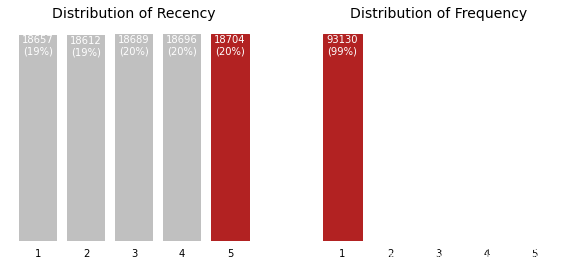

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = RFM_table[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = RFM_table[(RFM_table['R'] == r) & (RFM_table['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()